In [8]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# import warnings filter
from warnings import simplefilter

In [9]:
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# load dataset
#filename = '/content/sample_data/pima-indians_classification_train.csv'
filename = '../../datasets/pima-indians_classification_train.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)


In [10]:
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [11]:
# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=300)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=23,weights='distance')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [12]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10)#, random_state=7)
	cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	#print(results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.776042 (0.051575)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.693917 (0.065730)
NB: 0.755178 (0.042766)
SVM: 0.760424 (0.052931)


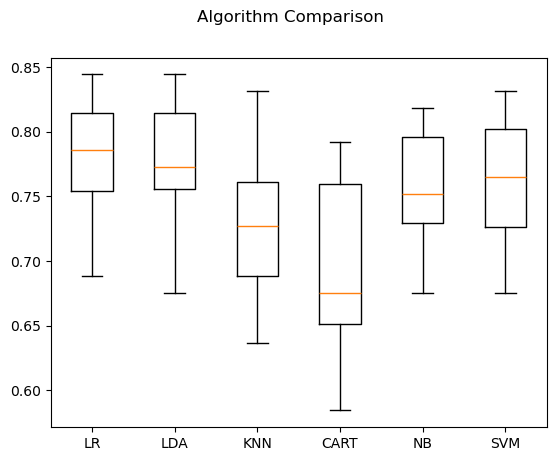

In [13]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()